In [1]:
#import __init__
import vsrl_utils as vu
import numpy as np
from PIL import Image
from pathlib import Path
%matplotlib inline
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def draw_bbox(plt, ax, rois, fill=False, linewidth=2, edgecolor=[1.0, 0.0, 0.0], **kwargs):
    for i in range(rois.shape[0]):
        roi = rois[i,:].astype(np.int)
        ax.add_patch(plt.Rectangle((roi[0], roi[1]),
            roi[2] - roi[0], roi[3] - roi[1],
            fill=False, linewidth=linewidth, edgecolor=edgecolor, **kwargs))

def subplot(plt, Y, X, sz_y=10, sz_x=10):
    plt.rcParams['figure.figsize'] = (X*sz_x, Y*sz_y)
    fig, axes = plt.subplots(Y, X)
    return fig, axes

In [31]:
dir_name = '/home/shuchen/data/github/iCAN/Data/v-coco/data'

# Load COCO annotations for V-COCO images
coco = vu.load_coco(dir_name)

# Load the VCOCO annotations for vcoco image set
vcoco_all = vu.load_vcoco('vcoco_val', dir_name)
for x in vcoco_all:
    x = vu.attach_gt_boxes(x, coco)

In [4]:
# Action classes and roles in V-COCO
classes = [x['action_name'] for x in vcoco_all]
for i, x in enumerate(vcoco_all):
    print('{:>20s}'.format(x['action_name']), x['role_name'], len(vcoco_all))

                hold ['agent', 'obj'] 26
               stand ['agent'] 26
                 sit ['agent', 'instr'] 26
                ride ['agent', 'instr'] 26
                walk ['agent'] 26
                look ['agent', 'obj'] 26
                 hit ['agent', 'instr', 'obj'] 26
                 eat ['agent', 'obj', 'instr'] 26
                jump ['agent', 'instr'] 26
                 lay ['agent', 'instr'] 26
       talk_on_phone ['agent', 'instr'] 26
               carry ['agent', 'obj'] 26
               throw ['agent', 'obj'] 26
               catch ['agent', 'obj'] 26
                 cut ['agent', 'instr', 'obj'] 26
                 run ['agent'] 26
    work_on_computer ['agent', 'instr'] 26
                 ski ['agent', 'instr'] 26
                surf ['agent', 'instr'] 26
          skateboard ['agent', 'instr'] 26
               smile ['agent'] 26
               drink ['agent', 'instr'] 26
                kick ['agent', 'obj'] 26
               point ['agent', 'instr'

In [5]:
print(classes, end='')

['hold', 'stand', 'sit', 'ride', 'walk', 'look', 'hit', 'eat', 'jump', 'lay', 'talk_on_phone', 'carry', 'throw', 'catch', 'cut', 'run', 'work_on_computer', 'ski', 'surf', 'skateboard', 'smile', 'drink', 'kick', 'point', 'read', 'snowboard']

In [6]:
# Visualize annotations for the some class
cls_id = classes.index('look')
vcoco = vcoco_all[cls_id]

vcoco.keys()
#vcoco
vcoco_all[0].keys()

dict_keys(['image_id', 'ann_id', 'role_object_id', 'label', 'action_name', 'role_name', 'include', 'bbox', 'role_bbox'])

### vcoco data items of each action type
- **image_id**
    - ids of all images that contain this action type
- **ann_id**
    - annotation id of agent
- **role_object_id**
    - annotation ids of agent and objects
    - length varies according to different actions (role_name item as below)
    - ignored if 0
- **label**
    - 1: the image content is consistent to action_name
    - 0: otherwise
- **action_name**
    - name of action
- **role_name**
    - names of roles
- **include**
    - object names included (not complete)
- **bbox**
    - bbox of agent
- **role_bbox**
    - bboxes of agent and objects
    
### Recommended methods for image and annotations retrieving
- image retrieving
    - use **image_id** and **coco.loadImgs** to get json object of image
- annotations retrieving
    - use **role_object_id** to collect annotation ids of agent and objects
    - use **coco.loadAnns** and annotation ids to get json object of annotations
- bbox retrieving
    - use **role_bbox** to get bboxes of agent and objects

image id: 549237
file name: COCO_train2014_000000549237.jpg

annotation id: 557021
role_object_id: [557021 303309]
ann_id 557021, category_id 1: [{'supercategory': 'person', 'id': 1, 'name': 'person'}]
ann_id 303309, category_id 37: [{'supercategory': 'sports', 'id': 37, 'name': 'sports ball'}]

bbox:  [[484.03 162.69 558.4  318.63]]
role_box:  [484.03 162.69 558.4  318.63 239.64 319.83 267.89 347.89]


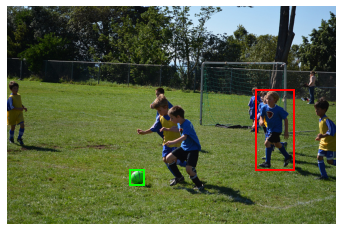

In [7]:
np.random.seed(1)
positive_index = np.where(vcoco['label'] == 1)[0]
positive_index = np.random.permutation(positive_index)

# the demo here laods images from the COCO website, 
# you can alternatively use your own local folder of COCO images.
load_coco_image_from_web = False
if load_coco_image_from_web:
    base_coco_url = 'http://mscoco.org/images/'
    from PIL import Image
    from io import StringIO
    from urllib.request import urlopen
else:
    base_coco_dir = '/home/shuchen/data/github/iCAN/Data/v-coco/coco/images/train2014/'

cc = plt.get_cmap('hsv', lut=4)

for i in range(1):
    id = positive_index[i]

    # load image
    coco_image = coco.loadImgs(ids=[vcoco['image_id'][id][0]])[0]
    print(f'image id: {coco_image["id"]}')
    print(f'file name: {coco_image["file_name"]}')
    #print('coco_image: ', coco_image)
    print()
    
    # load annotations
    print(f'annotation id: {vcoco["ann_id"][id][0]}')
    role_object_id = vcoco['role_object_id'][id,:]
    print(f'role_object_id: {role_object_id}')
    for ann_id in role_object_id.tolist():
        if ann_id == 0:
            break
        anns = coco.loadAnns(ann_id)[0]
        cats_id = anns['category_id']
        cats = coco.loadCats(cats_id)
        print(f'ann_id {ann_id}, category_id {cats_id}: {cats}')
    print()
    
    if load_coco_image_from_web:
        coco_url = base_coco_url + str(coco_image['id'])
        file = StringIO(urlopen(coco_url).read())
        im = np.asarray(Image.open(file))
    else:
        file = base_coco_dir + coco_image['file_name']
        im = np.asarray(Image.open(file))
        
    sy = 4.; sx = float(im.shape[1])/float(im.shape[0])*sy;
    fig, ax = subplot(plt, 1, 1, sy, sx); ax.set_axis_off(); 
    ax.imshow(im);
    
    # draw bounding box for agent
    draw_bbox(plt, ax, vcoco['bbox'][[id],:], edgecolor=cc(0)[:3])
    print('bbox: ', vcoco['bbox'][[id],:])
    
    # draw bounding box for roles
    role_bbox = vcoco['role_bbox'][id,:]*1.
    print('role_box: ', role_bbox)
    role_bbox = role_bbox.reshape((-1,4))
    for j in range(1, len(vcoco['role_name'])):
        if not np.isnan(role_bbox[j,0]):
            draw_bbox(plt, ax, role_bbox[[j],:], edgecolor=cc(j)[:3])

In [33]:
anns = coco.loadAnns(vcoco['role_object_id'][33])
#coco.getAnnIds(179201)
len(anns)
anns[0].keys()
coco.loadImgs(226162)

[{'license': 3,
  'file_name': 'COCO_train2014_000000226162.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000226162.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-20 18:16:39',
  'flickr_url': 'http://farm9.staticflickr.com/8058/8246571410_bf8c2b3604_z.jpg',
  'id': 226162}]

### Agent object pairs
- randomly choose some images from vcoco and see their corresponding actions and category ids

In [27]:
from random import choice
# cut: 395225
img_ids = vcoco['image_id'].flatten().tolist()
#print(img_ids)
for _ in range(1):
    img_id = choice(img_ids)
    print('Imgage id: ', img_id)
    ann_ids = coco.getAnnIds(img_id)
    #print(ann_ids)
    anns = coco.loadAnns(ann_ids)
    print('    Number of annotations: ', len(anns))
    print('    Annotation keys: ', anns[0].keys())
    action_names = [x['action_name'] for x in vcoco_all]
    #print(action_names)

    img_id_idx = [x['image_id'].tolist().index([img_id])]
    action_filtered = [x['action_name'] for x in vcoco_all if x['label'][img_id_idx] == [1]]
    if not action_filtered:
        continue
    print('    Possible action types: ', action_filtered)

    role_object_ids_all = [vcoco_all[action_names.index(x)]['role_object_id'][img_id_idx] for x in action_filtered]
    print('    All annotation ids of role and object: ', role_object_ids_all)
    print()
    
    for i, role_object_ids in enumerate(role_object_ids_all):
        role_object_ids = role_object_ids.flatten().tolist()
        while role_object_ids[-1] == 0:
            role_object_ids.pop()
        assert 0 not in role_object_ids, f'0 happens in {role_object_ids}'
        
        cat_ids = [x['category_id'] for x in coco.loadAnns(role_object_ids)]
        print('    Categories of role and object: ', coco.loadCats(cat_ids))
        print('    Category ids of role and object', cat_ids)
        assert cat_ids[0] == 1, f'agent id not first in {cat_ids}'
        print('    ', '*'*30)
    print('-' * 50)

Imgage id:  155262
    Number of annotations:  9
    Annotation keys:  dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
    Possible action types:  ['stand', 'look']
    All annotation ids of role and object:  [array([[438380]]), array([[ 438380, 1459072]])]

1
    Categories of role and object:  [{'supercategory': 'person', 'id': 1, 'name': 'person'}]
    Category ids of role and object [1]
     ******************************
2
    Categories of role and object:  [{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'sports', 'id': 37, 'name': 'sports ball'}]
    Category ids of role and object [1, 37]
     ******************************
--------------------------------------------------


### V-COCO train, val and test datasets
- **Notice**
    - One image might be assigned with **multiple action types**, label all of them

train
  Num of actions:  26
  Num of images total:  3932
val
  Num of actions:  26
  Num of images total:  4499
test
  Num of actions:  26
  Num of images total:  7768


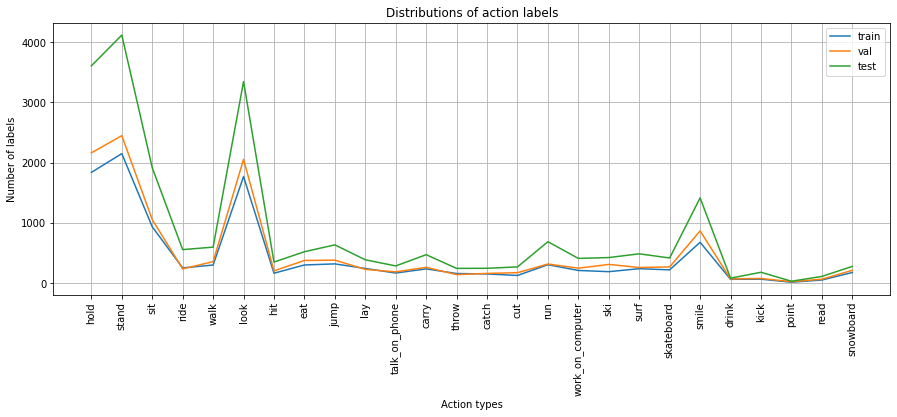

In [46]:
stats = {}
plt.figure(figsize=(15,5))
plt.title('Distributions of action labels')
for split in ['train', 'val', 'test']:
    print(split)
    vcoco_split = vu.load_vcoco(f'vcoco_{split}', dir_name)
    total_num_imgs = len(vcoco_split[0]['image_id'])
    print('  Num of actions: ', len(vcoco_split))
    #print('  Keys of an action: ', vcoco_split[0].keys())
    print('  Num of images total: ', total_num_imgs)

    stats[split] = {}
    for x in vcoco_split:
        sum_label = x['label'].sum()
        act_name = x['action_name']
        stats[split][act_name] = sum_label

    plt.plot(stats[split].values(), label=split)
    plt.xlabel('Action types')
    plt.ylabel('Number of labels')
    plt.xticks(list(range(26)), stats[split].keys(), rotation='vertical')
plt.grid()
plt.legend()
plt.show()